##  <font color=MediumSlateBlue>Importing Libraries</font> ##

In [84]:
!pip install colorama
import random
import pprint
import io
import numpy as np
import sys
from gym.envs.toy_text import discrete
from colorama import Fore, Back, Style
import matplotlib.pyplot as plt

##  <font color=MediumSlateBlue>Directions</font> ##

In [85]:
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

##  <font color=MediumSlateBlue>Environment</font> ##

In [86]:
class GridworldEnv(discrete.DiscreteEnv):
  metadata = {'render.modes': ['human', 'ansi']}

  def __init__(self, shape=[10,10]):
    if not isinstance(shape, (list, tuple)) or not len(shape) == 2:
        raise ValueError('shape argument must be a list/tuple of length 2')
        
    self.shape = shape

    nS = np.prod(shape)
    nA = 4

    MAX_Y = shape[0]
    MAX_X = shape[1]

    P = {}
    grid = np.arange(nS).reshape(shape)
    it = np.nditer(grid, flags=['multi_index'])

    while not it.finished:
      s = it.iterindex
      y, x = it.multi_index

      # P[s][a] = (prob, next_state, reward, is_done)
      P[s] = {a : [] for a in range(nA)}

      #Reaching target
      is_done = lambda s: s == 0

      #Due to existance of walls, these moves are not available
      no_up = lambda s: s in [44,45,63,64]
      no_down = lambda s: s in [23,24,25,44]
      no_left = lambda s: s in [44,36,55]
      no_right = lambda s: s in [32,42,52]

      #Barries in the path
      pit = lambda s: s in [13,62,41]
      wall = lambda s: s in [43,33,53,34,35,54]

      #Rewards of each state
      reward = 1.0 if is_done(s) else 0.0
      reward = -10.0 if pit(s) else reward
      
      ns_up = s if y == 0 else s - MAX_X
      ns_right = s if x == (MAX_X - 1) else s + 1
      ns_down = s if y == (MAX_Y - 1) else s + MAX_X
      ns_left = s if x == 0 else s - 1
      
      P[s][UP] = [(1, ns_up, reward, is_done(ns_up))]
      P[s][RIGHT] = [(1.0, ns_right, reward, is_done(ns_right))]
      P[s][DOWN] = [(1, ns_down, reward, is_done(ns_down))]
      P[s][LEFT] = [(1, ns_left, reward, is_done(ns_left))]

      #Terminal state
      if is_done(s):
        P[s][UP] = [(1.0, s, reward, True)]
        P[s][RIGHT] = [(1.0, s, reward, True)]
        P[s][DOWN] = [(1.0, s, reward, True)]
        P[s][LEFT] = [(1.0, s, reward, True)]

      #Encountering walls
      if no_up(s):
        P[s][UP] = [(1.0, s, -3.0 , False)]                
      if no_down(s):
        P[s][DOWN] = [(1.0, s, -3.0 , False)]                
      if no_right(s):
        P[s][RIGHT] = [(1.0, s, -3.0 , False)]  
      if no_left(s):
        P[s][LEFT] = [(1.0, s, -3.0 , False)] 

      it.iternext() 

    # Initial state distribution is uniform
    isd = np.zeros(100)
    isd[44]=1
    self.P = P

    super(GridworldEnv, self).__init__(nS, nA, P, isd)

  def _render(self, mode='human', close=False):
    if close:
      return

    outfile = io.StringIO() if mode == 'ansi' else sys.stdout

    grid = np.arange(self.nS).reshape(self.shape)
    it = np.nditer(grid, flags=['multi_index'])

    while not it.finished:
      s = it.iterindex
      y, x = it.multi_index

      if self.s == s and not s==0:
        output =  Back.CYAN + Style.BRIGHT + Fore.WHITE +  "  웃 " + Style.RESET_ALL if s not in [13,62,41] else Back.BLUE + Style.BRIGHT + Fore.WHITE + "  웃 " + Style.RESET_ALL
      elif s == 0:
          output = Back.GREEN + Style.BRIGHT + Fore.WHITE + "     " + Style.RESET_ALL if not self.s==0 else Back.GREEN + Style.BRIGHT + Fore.WHITE +  "  웃 " + Style.RESET_ALL
      elif s in [13,62,41]:
          output = Back.BLUE + "     " + Style.RESET_ALL
      elif s in [43,33,53,34,35,54]:
          output = Back.CYAN + Style.BRIGHT + Fore.BLACK +   "  █  "  + Style.RESET_ALL
      else:
          output = Back.CYAN + Style.BRIGHT + Fore.BLACK +  "  .  " + Style.RESET_ALL

      if x == 0:
          output = output.lstrip()
      if x == self.shape[1] - 1:
          output = output.rstrip()

      outfile.write(output)

      if x == self.shape[1] - 1:
          outfile.write("\n")

      it.iternext()

##  <font color=MediumSlateBlue>How to use the above class?</font> ##

In [87]:
env =  GridworldEnv()
env.reset()
env._render()

for _ in range(2):
    action = env.action_space.sample()
    state, reward, done, info = env.step(action) # Take a random action
    print(info)
    print('action:',action)
    env._render()
env.close()


       .    .    .    .    .    .    .    .    .  
  .    .    .         .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    █    █    █    .    .    .    .  
  .         .    █    웃   .    .    .    .    .  
  .    .    .    █    █    .    .    .    .    .  
  .    .         .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
{'prob': 1.0}
action: 2
       .    .    .    .    .    .    .    .    .  
  .    .    .         .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    █    █    █    .    .    .    .  
  .         .    █    웃   .    .    .    .    .  
  .    .    .    █    █    .    .    .    .    .  
  .    .         .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    . 

In [88]:
#make Q matrix. first it is empty
num_act = env.action_space.n
num_state = env.observation_space.n
q_mat = np.zeros((num_state, num_act))
#set parameters
max_episodes = 20000       
learning_rate = 0.5         
gamma = 0.99                 
epsilon = 1.0                 
decay_rate = 0.999
rewards = []
#start training
for episode in range(max_episodes):
    # rest and begin
    state = env.reset()
    done = False
    total_rewards = 0
    
    for i in range(100):
        temp_p = np.random.rand() #generate random number
        if temp_p > epsilon:#compare it
            action = np.argmax(q_mat[state,:])
        else:
            action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)#use action to find new state and reward 
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        q_mat[state, action] = q_mat[state, action] + learning_rate * (reward + gamma * np.max(q_mat[new_state, :]) - q_mat[state, action])#update Q
        total_rewards = total_rewards + reward
        state = new_state
        
        # If done end it
        if done == True: 
            temp1, reward, temp2, temp3 = env.step(3)
            q_mat[state, action] = q_mat[state, action] + learning_rate * (reward + gamma * np.max(q_mat[new_state, :]) - q_mat[state, action])
            total_rewards += reward
            break
        #if fall in deep end it
        if reward == -10:
            state=env.reset()
        else:
            state = new_state
    #reduce epsilon each episod
    epsilon = epsilon *decay_rate
    epsilon = max(0.0001, epsilon)
    rewards.append(total_rewards)

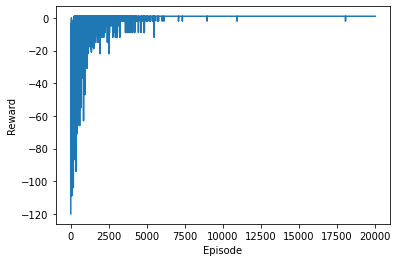

1.0


In [94]:
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

In [106]:
# testing Q learning model
env.reset()
#change startig poit
env.step(1)
env.step(2)
env.step(2)
env.step(2)
state, reward, done, info  = env.step(3)
print("state: ", state)
env._render()
print('Start finding ...')
#we set maximum iteration
for _ in range(50):
    action = np.argmax(q_mat[state,:])#find best action with Q matrix
    state, reward, done, info = env.step(action) # Take a  action
    print("state: ", state)
    print('action:',action)
    env._render()
    if done == True:
        break
env.close()

state:  74
       .    .    .    .    .    .    .    .    .  
  .    .    .         .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    █    █    █    .    .    .    .  
  .         .    █    .    .    .    .    .    .  
  .    .    .    █    █    .    .    .    .    .  
  .    .         .    .    .    .    .    .    .  
  .    .    .    .    웃   .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
Start finding ...
state:  75
action: 1
       .    .    .    .    .    .    .    .    .  
  .    .    .         .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    █    █    █    .    .    .    .  
  .         .    █    .    .    .    .    .    .  
  .    .    .    █    █    .    .    .    .    .  
  .    .         .    .    .    .    .    .    .  
  .    .    .    .    .    웃   .    .    .    .  
  .    .    .    .    .    .    . 

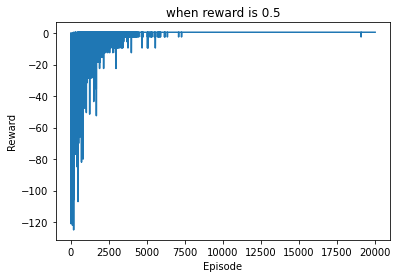

In [102]:
#change reward to 0.5
#make Q matrix. first it is empty
num_act = env.action_space.n
num_state = env.observation_space.n
q_mat = np.zeros((num_state, num_act))
#set parameters
max_episodes = 20000       
learning_rate = 0.5         
gamma = 0.99                 
epsilon = 1.0                 
decay_rate = 0.999
rewards = []
#start training
for episode in range(max_episodes):
    # rest and begin
    state = env.reset()
    done = False
    total_rewards = 0
    
    for i in range(100):
        temp_p = np.random.rand() #generate random number
        if temp_p > epsilon:#compare it
            action = np.argmax(q_mat[state,:])
        else:
            action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)#use action to find new state and reward 
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        q_mat[state, action] = q_mat[state, action] + learning_rate * (reward + gamma * np.max(q_mat[new_state, :]) - q_mat[state, action])#update Q
        total_rewards = total_rewards + reward
        state = new_state
        
        # If done end it
        if done == True: 
            temp1, reward, temp2, temp3 = env.step(3)
            reward = 0.5
            q_mat[state, action] = q_mat[state, action] + learning_rate * (reward + gamma * np.max(q_mat[new_state, :]) - q_mat[state, action])
            total_rewards += reward
            break
        #if fall in deep end it
        if reward == -10:
            state=env.reset()
        else:
            state = new_state
    #reduce epsilon each episod
    epsilon = epsilon *decay_rate
    epsilon = max(0.0001, epsilon)
    rewards.append(total_rewards)
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('when reward is 0.5')
plt.show()

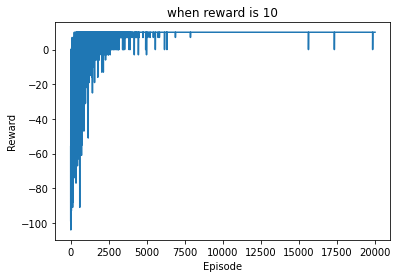

In [103]:
#change reward to 0.5
#make Q matrix. first it is empty
num_act = env.action_space.n
num_state = env.observation_space.n
q_mat = np.zeros((num_state, num_act))
#set parameters
max_episodes = 20000       
learning_rate = 0.5         
gamma = 0.99                 
epsilon = 1.0                 
decay_rate = 0.999
rewards = []
#start training
for episode in range(max_episodes):
    # rest and begin
    state = env.reset()
    done = False
    total_rewards = 0
    
    for i in range(100):
        temp_p = np.random.rand() #generate random number
        if temp_p > epsilon:#compare it
            action = np.argmax(q_mat[state,:])
        else:
            action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)#use action to find new state and reward 
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        q_mat[state, action] = q_mat[state, action] + learning_rate * (reward + gamma * np.max(q_mat[new_state, :]) - q_mat[state, action])#update Q
        total_rewards = total_rewards + reward
        state = new_state
        
        # If done end it
        if done == True: 
            temp1, reward, temp2, temp3 = env.step(3)
            reward = 10
            q_mat[state, action] = q_mat[state, action] + learning_rate * (reward + gamma * np.max(q_mat[new_state, :]) - q_mat[state, action])
            total_rewards += reward
            break
        #if fall in deep end it
        if reward == -10:
            state=env.reset()
        else:
            state = new_state
    #reduce epsilon each episod
    epsilon = epsilon *decay_rate
    epsilon = max(0.0001, epsilon)
    rewards.append(total_rewards)
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('when reward is 10')
plt.show()

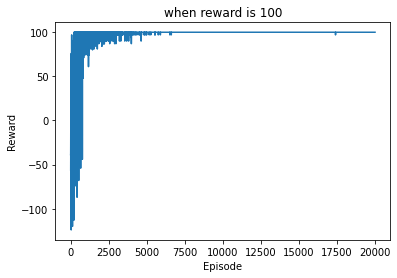

In [104]:
#change reward to 0.5
#make Q matrix. first it is empty
num_act = env.action_space.n
num_state = env.observation_space.n
q_mat = np.zeros((num_state, num_act))
#set parameters
max_episodes = 20000       
learning_rate = 0.5         
gamma = 0.99                 
epsilon = 1.0                 
decay_rate = 0.999
rewards = []
#start training
for episode in range(max_episodes):
    # rest and begin
    state = env.reset()
    done = False
    total_rewards = 0
    
    for i in range(100):
        temp_p = np.random.rand() #generate random number
        if temp_p > epsilon:#compare it
            action = np.argmax(q_mat[state,:])
        else:
            action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)#use action to find new state and reward 
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        q_mat[state, action] = q_mat[state, action] + learning_rate * (reward + gamma * np.max(q_mat[new_state, :]) - q_mat[state, action])#update Q
        total_rewards = total_rewards + reward
        state = new_state
        
        # If done end it
        if done == True: 
            temp1, reward, temp2, temp3 = env.step(3)
            reward = 100
            q_mat[state, action] = q_mat[state, action] + learning_rate * (reward + gamma * np.max(q_mat[new_state, :]) - q_mat[state, action])
            total_rewards += reward
            break
        #if fall in deep end it
        if reward == -10:
            state=env.reset()
        else:
            state = new_state
    #reduce epsilon each episod
    epsilon = epsilon *decay_rate
    epsilon = max(0.0001, epsilon)
    rewards.append(total_rewards)
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('when reward is 100')
plt.show()

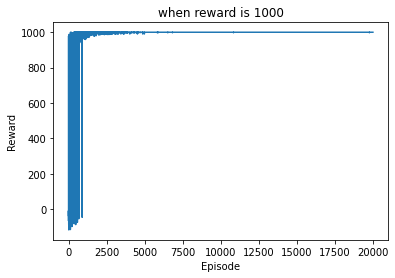

In [105]:
#change reward to 0.5
#make Q matrix. first it is empty
num_act = env.action_space.n
num_state = env.observation_space.n
q_mat = np.zeros((num_state, num_act))
#set parameters
max_episodes = 20000       
learning_rate = 0.5         
gamma = 0.99                 
epsilon = 1.0                 
decay_rate = 0.999
rewards = []
#start training
for episode in range(max_episodes):
    # rest and begin
    state = env.reset()
    done = False
    total_rewards = 0
    
    for i in range(100):
        temp_p = np.random.rand() #generate random number
        if temp_p > epsilon:#compare it
            action = np.argmax(q_mat[state,:])
        else:
            action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)#use action to find new state and reward 
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        q_mat[state, action] = q_mat[state, action] + learning_rate * (reward + gamma * np.max(q_mat[new_state, :]) - q_mat[state, action])#update Q
        total_rewards = total_rewards + reward
        state = new_state
        
        # If done end it
        if done == True: 
            temp1, reward, temp2, temp3 = env.step(3)
            reward = 1000
            q_mat[state, action] = q_mat[state, action] + learning_rate * (reward + gamma * np.max(q_mat[new_state, :]) - q_mat[state, action])
            total_rewards += reward
            break
        #if fall in deep end it
        if reward == -10:
            state=env.reset()
        else:
            state = new_state
    #reduce epsilon each episod
    epsilon = epsilon *decay_rate
    epsilon = max(0.0001, epsilon)
    rewards.append(total_rewards)
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('when reward is 1000')
plt.show()